In [1]:
import glob
import numpy as np
import datetime as dt
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
company_name = {
    "CFG": "",
    "FHN": "",
    "SF": "",
    "IBKR": "",
    "ALLY": "",
    "WFC": "",
    "C": "Citigroup",
    "BAC": "",
    "FRC": "",
    "JPM": "",
    "DCOM": "",
    "PEBO": "",
    "SBNY": "",
    "FNB": "",
    "OCFC": "",
    "MSFT": "",
    "NVDA": "",
    "FB": "",
    "GOOGL": "Google",
    "AAPL": "",
    "NVS": "",
    "AZN": "",
    "MRNA": "",
    "PFE": "",
    "JNJ": ""
}

In [3]:
df = pd.DataFrame()
portfolio_paths = ["Data/Technology/Large-Cap/NVDA.csv", "Data/Healthcare/Large-Cap/MRNA.csv",
                   "Data/Banking/Large-Cap/FRC.csv"]

for path in portfolio_paths:
    print(path)
    sector = path.split("/")[1]
    cap = path.split("/")[2]
    company = path.split("/")[3].split(".")[0]
    
    newdf = pd.read_csv(path, usecols=["Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
    
    lendf = len(newdf)
    newdf["Sector"] = [sector] * lendf
    newdf["Cap"] = [cap] * lendf
    newdf["Company"] = [company] * lendf
    df = pd.concat([df, newdf], axis=0)

print(df.shape)
df.head()

Data/Technology/Large-Cap/NVDA.csv
Data/Healthcare/Large-Cap/MRNA.csv
Data/Banking/Large-Cap/FRC.csv
(1257, 4)


,Close,Sector,Cap,Company
Date,,,,
2019-12-02,52.312500,Technology,Large-Cap,NVDA
2019-12-03,51.915001,Technology,Large-Cap,NVDA
2019-12-04,52.355000,Technology,Large-Cap,NVDA
2019-12-05,52.185001,Technology,Large-Cap,NVDA
2019-12-06,53.042500,Technology,Large-Cap,NVDA


In [4]:
benchmark_all = pd.read_csv("Data/Benchmark/S&P 500.csv", usecols=[" Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
benchmark_all.rename(columns={' Close': 'S&P 500'}, inplace=True)
benchmark_all = benchmark_all.pct_change().dropna()
print(benchmark_all.columns)
print(benchmark_all.shape)
benchmark_all.head()

Index(['S&P 500'], dtype='object')
(418, 1)


,S&P 500
Date,
2021-07-29,0.005435
2021-07-28,-0.004189
2021-07-27,0.000186
2021-07-26,0.004735
2021-07-23,-0.002377


In [5]:
large_cap = df

In [6]:
large_cap["Sector"].value_counts()

Healthcare    419
Technology    419
Banking       419
Name: Sector, dtype: int64

In [7]:
large_cap[["Sector","Company"]].value_counts()

Sector      Company
Banking     FRC        419
Healthcare  MRNA       419
Technology  NVDA       419
dtype: int64

### Output 1 -> Average risk of portfolio and benchmark for large-cap

In [8]:
large_cap.head()

,Close,Sector,Cap,Company
Date,,,,
2019-12-02,52.312500,Technology,Large-Cap,NVDA
2019-12-03,51.915001,Technology,Large-Cap,NVDA
2019-12-04,52.355000,Technology,Large-Cap,NVDA
2019-12-05,52.185001,Technology,Large-Cap,NVDA
2019-12-06,53.042500,Technology,Large-Cap,NVDA


In [9]:
large_cap.drop(columns=["Cap"], inplace=True)

In [10]:
large_cap_pivot = pd.pivot_table(large_cap, values="Close", index="Date", columns=["Sector", "Company"])
large_cap_pivot.head()

Sector,Banking,Healthcare,Technology
Company,FRC,MRNA,NVDA
Date,,,
2019-12-02,110.070000,19.760000,52.312500
2019-12-03,109.070000,21.280001,51.915001
2019-12-04,110.260002,21.270000,52.355000
2019-12-05,110.970001,20.639999,52.185001
2019-12-06,112.529999,18.940001,53.042500


In [11]:
large_cap_returns = large_cap_pivot.pct_change()
print(large_cap_returns.shape)
large_cap_returns.head()

(419, 3)


Sector,Banking,Healthcare,Technology
Company,FRC,MRNA,NVDA
Date,,,
2019-12-02,NaN,NaN,NaN
2019-12-03,-0.009085,0.076923,-0.007599
2019-12-04,0.010910,-0.000470,0.008475
2019-12-05,0.006439,-0.029619,-0.003247
2019-12-06,0.014058,-0.082364,0.016432


In [12]:
large_cap_returns.dropna(inplace=True)
print(large_cap_returns.shape)

(418, 3)


In [13]:
large_cap_returns.head(2)

Sector,Banking,Healthcare,Technology
Company,FRC,MRNA,NVDA
Date,,,
2019-12-03,-0.009085,0.076923,-0.007599
2019-12-04,0.010910,-0.000470,0.008475


In [14]:
total_portfolio = pd.merge(large_cap_returns, benchmark_all, left_on="Date", right_on="Date")
total_portfolio.head()

/Users/mrunalighelani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(Banking, FRC)","(Healthcare, MRNA)","(Technology, NVDA)",S&P 500
Date,,,,
2019-12-03,-0.009085,0.076923,-0.007599,-0.006284
2019-12-04,0.010910,-0.000470,0.008475,-0.001498
2019-12-05,0.006439,-0.029619,-0.003247,-0.009053
2019-12-06,0.014058,-0.082364,0.016432,0.003173
2019-12-09,0.002222,-0.008448,0.000000,0.001098


In [15]:
portfolio_risk = total_portfolio.std()
portfolio_risk.head()

(Banking, FRC)        0.025565
(Healthcare, MRNA)    0.056376
(Technology, NVDA)    0.032498
S&P 500               0.017906
dtype: float64

<AxesSubplot:title={'center':'Risk'}>

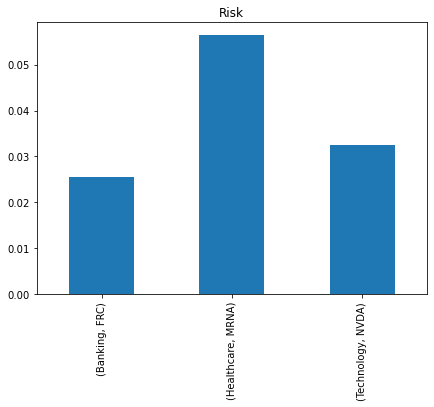

In [26]:
portfolio_risk[:3].plot(kind="bar", figsize=(7,5), title="Risk")

In [16]:
total_portfolio_std = total_portfolio.std()
annualized_portfolio_std= total_portfolio_std*np.sqrt(252)
annualized_portfolio_std

(Banking, FRC)        0.405834
(Healthcare, MRNA)    0.894937
(Technology, NVDA)    0.515894
S&P 500               0.284255
dtype: float64

In [17]:
sharpe_ratio =  (total_portfolio.mean()*252) / annualized_portfolio_std
sharpe_ratio

(Banking, FRC)        1.081764
(Healthcare, MRNA)    2.373072
(Technology, NVDA)    1.812125
S&P 500              -0.606716
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

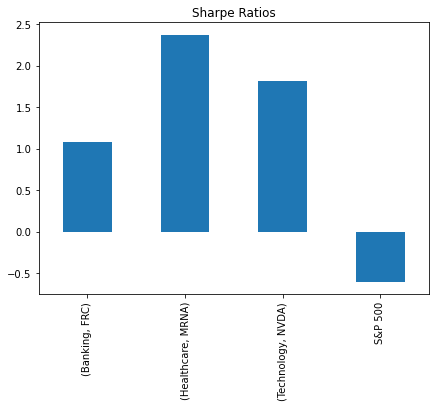

In [18]:
sharpe_ratio.plot(kind="bar", figsize=(7,5), title="Sharpe Ratios")

In [19]:
total_portfolio.corr()

,"(Banking, FRC)","(Healthcare, MRNA)","(Technology, NVDA)",S&P 500
"(Banking, FRC)",1.000000,-0.095353,0.394561,0.193323
"(Healthcare, MRNA)",-0.095353,1.000000,0.101118,0.047587
"(Technology, NVDA)",0.394561,0.101118,1.000000,0.199187
S&P 500,0.193323,0.047587,0.199187,1.000000


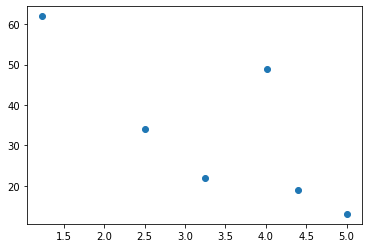

In [20]:
price = [2.50, 1.23, 4.02, 3.25, 5.00, 4.40]
sales_per_day = [34, 62, 49, 22, 13, 19]

plt.scatter(price, sales_per_day)
plt.show()

In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix for Portfolio')

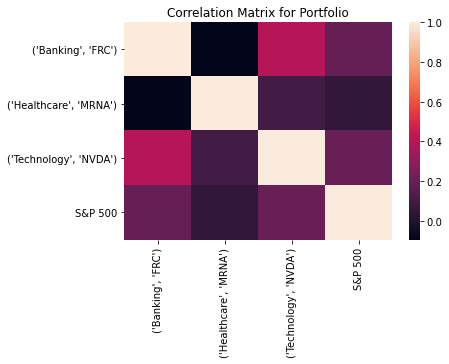

In [29]:
ax = plt.axes()
sns.heatmap(total_portfolio.corr(), ax = ax)
ax.set_title('Correlation Matrix for Portfolio')

In [23]:
total_portfolio.head()

,"(Banking, FRC)","(Healthcare, MRNA)","(Technology, NVDA)",S&P 500
Date,,,,
2019-12-03,-0.009085,0.076923,-0.007599,-0.006284
2019-12-04,0.010910,-0.000470,0.008475,-0.001498
2019-12-05,0.006439,-0.029619,-0.003247,-0.009053
2019-12-06,0.014058,-0.082364,0.016432,0.003173
2019-12-09,0.002222,-0.008448,0.000000,0.001098


In [24]:
total_portfolio.to_csv("Total_portfolio_correlation.csv")